In [2]:
# Initial matplotlib and numpy setup - DO NOT CHANGE.
#
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Set some global plotting parameters.
plt.rcParams['axes.linewidth']=1.5;

# CH413: Advanced Computational Chemistry
## Assessed work for Time-Dependent Quantum Mechanics

### Scott Habershon, Department of Chemistry

**Instructions:** Please work through the following questions. In each case, you will be asked to either edit some exisiting Python code, or write your own bit of code.

In the cases where you are asked to edit existing code, the sections you should edit begin with **# STUDENTS START**, and end with **# STUDENTS END**.

If you edit any other bits, you might end up with major problems - take care!

A guide to how much each question is worth is given below. Note that marks will also be given for presentation of graphs and other outputs.

***

## Question 1: The 1-dimensional double-well potential [25%]

In the Lectures, we saw how the Colbert-Miller DVR method can be used to calculate the eigenvectors and eigenvalues for generic 1-dimensional potential energy surfaces, $V(x)$. Once the eigenvalues and eigenvectors are known, it is then straightforward to calculate the wavefunction at any time $\psi(x,t)$.

For the 1-dimensional double-well potential, given by

$$
V(x) = \frac{1}{16 \eta} x^{4} - \frac{1}{2}x^{2},
$$

where $\eta = 1.3544$, you should:
1. calculate and display the first 3 eigenvalues,
2. calculate and display the $<x^{2}>$ expectation value for the first 3 eigenstates.

To achieve this, you should edit the following piece of code, which implements the standard Colbert-Miller DVR as discussed in Lectures and in the example CH413 Jupyter notebook. 

You can assume atomic units throughout, so $\hbar=1$. Also, assume that the particle mass is $m=1$.


In [2]:
# Set up system properties - we're using atomic units, where hbar = 1.0.
#
mass = 1.0
hbar = 1.0

# Set up a uniform grid:
Xmax = 5.0
Xmin = -5.0
Length = Xmax - Xmin
ngrid = 101
x = np.linspace(Xmin,Xmax,ngrid)
dx = x[1] - x[0]

#
# COLBERT-MILLER DVR HAMILTONIAN CONSTRUCTION.
#
# Set up space for kinetic and potential energy matrices.
#
V = np.zeros((ngrid,ngrid))
T = np.zeros( (ngrid,ngrid) )


############
# STUDENTS START
# Here, you need to create the potential energy and kinetic energy matrices, as discussed in Lectures 
# (and in my DVR notebook). You also need to calculate the total Hamiltonian matrix - make sure to 
# put it in an array H.
#




# STUDENTS END
####### 



# Solve the eigenvalue problem using the linalg.eigh
E,c = np.linalg.eigh(H)

# Print out the first few energy eigenvalues:
print '\n*** Energy eigenvalues ***\n'
print 'E[0] = ', E[0]
print 'E[1] = ', E[1]
print 'E[2] = ', E[2],'\n'

# Normalize each eigenfunction using simple quadrature.
for i in range(ngrid):  
    csum = 0.0
    for j in range(ngrid):
        csum += c[j,i]*c[j,i]*dx
    c[:,i] = c[:,i] / np.sqrt(csum)
    
vpot = np.zeros(ngrid)
for i in range(ngrid):
    vpot[i] = V[i,i]
    

#########
# STUDENTS START!
# Calculate and print the x**2 expectation value for the first 3 eigenstates.


# STUDENTS END!
#################


#
# Plot the probability distributions associated with the eigenvectors - DO NOT CHANGE....
#
plt.figure(1)
for i in range(3):
    plt.fill(x, (c[:,i])**2 + i, alpha=0.5)
    plt.plot(x, (c[:,i])**2 + i, linewidth=2.0)
plt.figure(1)
plt.plot(x,vpot,linewidth=2.5,linestyle='dashed',alpha=0.6)
plt.tick_params(axis='both',width=1.5,length=5)
plt.xlabel('x',fontsize=18)
plt.ylabel(r'$P(x)$',fontsize=18)
plt.xlim((-Length,Length))
plt.ylim((np.amin(vpot),3))
plt.xlim((Xmin,Xmax))
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.title('DVR probability distributions for quantum particle in double-well',fontsize=12)
plt.show()

NameError: name 'H' is not defined

## Question 2 [50%]

Once the eigenvalues and eigenvectors for a quantum-mechanical system are known (e.g. using the method of Question 1 above), it is then straightforward to calculate the wavefunction at any time $\psi(x,t)$. Specifically, we saw in the lecture that the wavefunction at position $x$ at time $t$ can be calculated as

$$
\psi(x,t) = \sum_{j=1}^{M} c_{j} e^{-i E_{j} t / \hbar} \phi_{j}(x),
$$
where $E_{j}$ is the energy (eigenvalue) for state $j$, and $\phi_{j}(x)$ is the value of the eigenstate $j$ at position $x$. The complex numbers $c_{j}$ are the expansion coefficients (at time $t=0$) for each eigenstate required to describe the initial wavefunction.

**Reminder:** From your calculation in Question 1, you have the energy eigenvalues now stored in a vector E[:], and you have the eigenstates stored in a matrix c[:,:]. In each case, the total number of states you have calculated is *ngrid*. The entry c[i,j] is the value of the $j$-th eigenstate at the $i$-th grid-point.  

In this question, we will use the eigenvectors and eigenvalues calculated in Question 1 to propagate a wavefunction which is given at time $t=0$ as 

$$
\psi(x,0) = \left( \frac{ 2 \alpha}{\pi} \right)^{1/4} e^{-\alpha(x-\mu)^{2}}
$$

where $\mu = -2.5$ and $\alpha = 0.5$. 


### Question 2(a)

First, calculate the value of the initial wavefunction $\psi(x,0)$ at all points on the grid x[:].

*Hint: Remember that the vector x[:] already contains the positions of each of the ngrid grid-points.*

In [49]:
# Initialize wavefunction on grid.

############
# STUDENTS START



# STUDENTS END
############


### Question 2(b)

Calculate the initial expansion coefficients for each eigenstate, as discussed in Lecture 2.

Here, we would like to express the initial wavefunction $\psi(x,0)$ as a linear combination of our known eigenstates:

$$
\psi(x,0) = \sum_{j=1}^{ngrid} c_{j} \phi_{j}(x).
$$

The eigenstate $\phi_{j}(x)$ are orthonormal, so each coefficient can be found as

$$
c_{j} = \int \phi_{j}(x) \psi(x,0) dx = \sum_{k=1}^{ngrid} \psi(x_{k},0) \times \phi_{j}(x_{k}) \times \Delta x.
$$

In the last part of the equation above, I have given a very approximate quadrature rule which can be used to calculate each expansion coefficient, where $\Delta x$ is the spacing between adjacent grid-points in our uniform grid x[:].


<IPython.core.display.Javascript object>


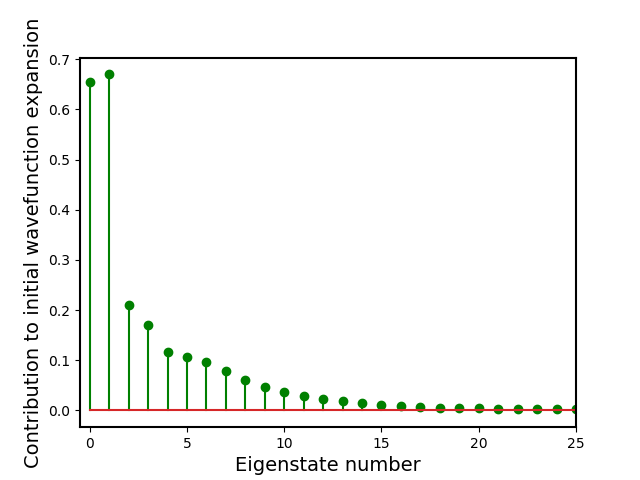

In [50]:
# Calculate the expansion coefficients of each eigenvector using a simple integration routine. 
# Put the results in the vector coeff[:]. 
#
coeff = np.zeros(ngrid,dtype='complex')

#################
# STUDENTS START





# STUDENTS END
################

# Plotting of the absolute values of coefficients - DO NOT CHANGE.
plt.figure(2)
plt.stem(abs(coeff),'g-',alpha=0.1,markerfmt='go')
plt.xlim([-0.5,25])
plt.xlabel('Eigenstate number',fontsize=14)
plt.ylabel('Contribution to initial wavefunction expansion',fontsize=14)
plt.show()

### Question 2(c)

Now that we know the eigenvalues, eigenstates and the initial expansion coefficients of the wavefunction, we can calculate the wavefunction at any time $t$ using the equations given at the start of Question 2 (see also Lecture 2).

Using the system set-up provided in the following box, complete the code to calculate the wavefunction for times up to $T_{max} = 100$ in steps of $dt = 0.05$.

Provide 3 plots showing the wavefunction magnitude at times $t=0$, $t=50$ and $t=100$.


In [51]:
# Calculation of the wavefunction at nt different times on the range [0,100].
#
# The following sets up the time points at which we'll calculate the wavefunction - DO NOT CHANGE.
#
im = np.complex(0,1)
dt = 0.05
Tmax = 100.0
nt = int(Tmax/dt)
t = np.linspace(0.0,Tmax,nt)


# Create some space for the time-dependent wavefunction. Here, we create an array wave[:,:] which is size (ngrid x nt). 
# In other words, it contains the wavefunction value at the ngrid grid-points at each of the nt time values.
#
wave = np.zeros( (ngrid,nt), dtype='complex')

#################
# STUDENTS START
#
# Loop over times....at each time, calculate the total wavefunction value at each grid -point.
#


# Once you know the wavefunction at all grid points at each time, plot the 3 requested 
# wavefunction magnitudes on the x[:] grid. 
#

# STUDENTS END
################


### Question 2(d)

Once the wavefunction is known, any time-dependent expectation value (*i.e.* observables) can be calculated according to:

$$
\langle A(t) \rangle = \frac{ \int \, \psi^{*}(x,t) A(x) \psi(x,t) \, dx}{\int \, \psi^{*}(x,t)\psi(x,t) \, dx}
$$

where $A(x)$ is the quantum-mechanical operator for the observable of interest.

Use this principle, along with the time-dependent wavefunction obtained above, to calculate and plot the *position expectation value* for the double-well potential.

In your answer, you should calculate $\langle x(t) \rangle$ for times ranging from $t=0$ to $t=100$. 

**Hint:** Our wavefunction is normalized, so the denominator is just 1 and you can ignore it. The integral in the numerator can be evaluated using the same quadrature as was used to calculate the initial expansion coefficients. Alternatively, you could use something like Simpson's rule if you're feeling adventurous!


<IPython.core.display.Javascript object>


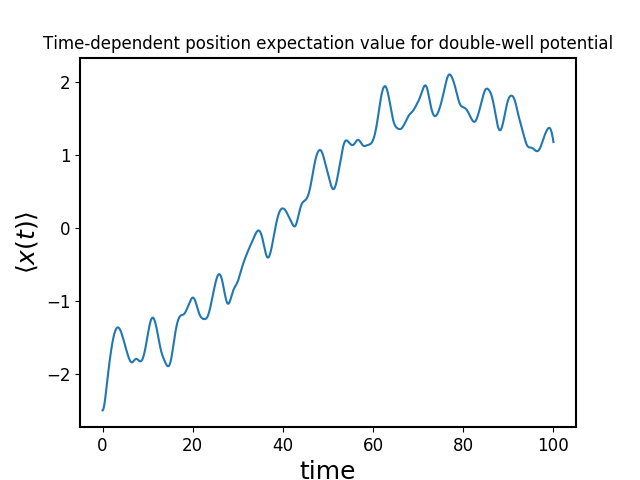

In [52]:
# Calculate the expectation values at each time using simple integration - put the result in the vectore xt[:],
# which should contain the position expectation value at each time-point.
#
xt = np.zeros(nt,dtype='complex')

###################
# STUDENTS START


# STUDENTS END
###############

# Plotting of the expectation value result - DO NOT CHANGE!
#
plt.figure(3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('time',fontsize=18)
plt.ylabel(r'$\langle x(t) \rangle$',fontsize=18)
plt.title('Time-dependent position expectation value for double-well potential')
plt.plot(t,xt.real)
plt.show()


## Question 3 [25%]

Copy the SOFT example given on my GitHub page for CH413 (https://github.com/ScottHabershon/CH413), and modify so that it performs the same quantum propagation (with the same PES and same initial conditions) as discussed above.

As output, you should plot the position expectation value for your wavepacket, as well as the absolute value of the wavepacket correlation function, defined as

$$
C(t) = \int \psi(x,t)^{*} \psi(x,0) \, dx.
$$

**Hint:** $C(t)$ should be defined as a complex vector (that is, $C(t)$ is complex). We're interested in plotting the absolute magnitude as a function of time.


<IPython.core.display.Javascript object>


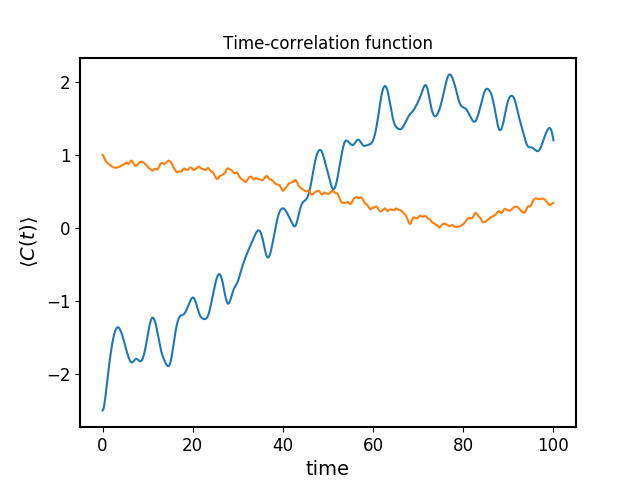

In [8]:
#####
# STUDENTS START

# STUDENTS END
#####
